refernces:
#https://coderzcolumn.com/tutorials/data-science/how-to-remove-trend-and-seasonality-from-time-series-data-using-python-pandas#2
https://stats.stackexchange.com/questions/304065/removing-monthly-trend-from-time-series
https://www.geeksforgeeks.org/python-pandas-plotting-the-autocorrelation-plot/

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
from google.colab import files 
  
import io
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['multiTimeline.csv']))

Saving multiTimeline.csv to multiTimeline (5).csv


In [ ]:
#Just checking for the data types of the columns and then printing them
print (data.head())
print( '\n Data Types:')
print(data.dtypes)

     Month  Diet  Gym  Finance
0  2004-01   100   31       48
1  2004-02    75   26       49
2  2004-03    67   24       47
3  2004-04    70   22       48
4  2004-05    72   22       43

 Data Types:
Month      object
Diet        int64
Gym         int64
Finance     int64
dtype: object


In [ ]:
from datetime import datetime
from pandas import DataFrame as df

#to convert the Month column into DateTime datatype
con=data['Month']
data['Month']=pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
#check datatype of index
df.head(data,n=5)



,Diet,Gym,Finance
Month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


,Diet,Gym,Finance
count,168.000000,168.000000,168.000000
mean,49.642857,34.690476,47.148810
std,8.033080,8.134316,4.972547
min,34.000000,22.000000,38.000000
25%,44.000000,28.000000,44.000000
50%,48.500000,32.500000,46.000000
75%,53.000000,41.000000,50.000000
max,100.000000,58.000000,73.000000


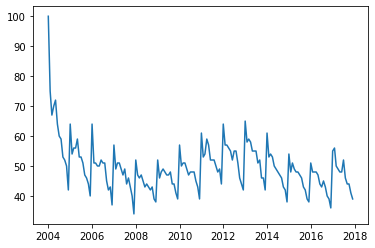

In [ ]:
#to plot the 'Diet' column
plt.plot(data['Diet'])
type(data['Diet'])
#describing the data
df.describe(data)

<class 'pandas.core.series.Series'>


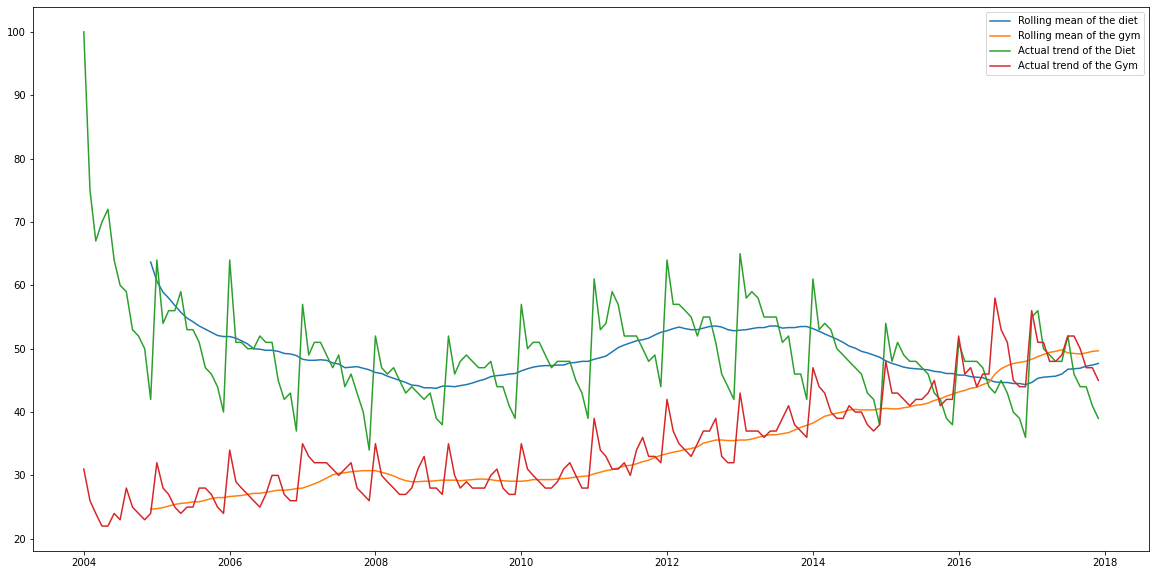

In [ ]:
#finding the rooling mean of the both the diet and the the gym columns
#I am taking the values of the windows as 12 months just for smoothening
diet_mean=data['Diet'].rolling(window=12).mean()
plt.figure(figsize=(20,10))
plt.plot(diet_mean,label='Rolling mean of the diet')
gym_mean=data['Gym'].rolling(window=12).mean()
plt.plot(gym_mean,label='Rolling mean of the gym')
plt.plot(data['Diet'],label='Actual trend of the Diet')
plt.plot(data['Gym'],label='Actual trend of the Gym')
plt.legend()
print(type(diet_mean))

In [ ]:
#tried two methods to remove seasonal components form the data,
#1st used the method of subtraction for Diet how ever i am not using this values for  plotting
d1=data['Diet'].values.astype(float)
d2=diet_mean.values.astype(float)
d3=[]
for i in range (0,len(d1)):
  d4=d1[i]-d2[i]
  d3.append(d4)
#print(d3)


#2nd used the .diff method for the same for Diet 
# here I took the value of n=1 to take the difference of (i+1 and i)

trend_rem_diet=np.diff(data['Diet'],n=1)

#plotting for the output from .diff method

#used the .diff method for the same for gym again taking n=1

trend_rem_gym=np.diff(data['Gym'],n=1)

#checking for the correrlation amongst all the variables

df.corr(data)

,Diet,Gym,Finance
Diet,1.000000,-0.100764,-0.034639
Gym,-0.100764,1.000000,-0.284279
Finance,-0.034639,-0.284279,1.000000


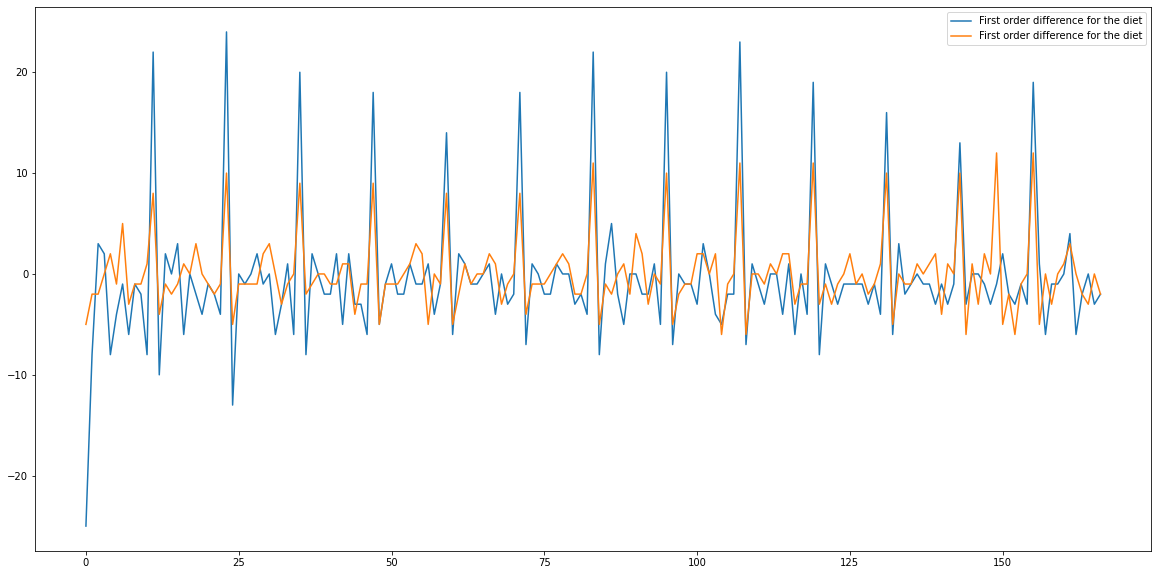

In [ ]:
plt.figure(figsize=(20,10))
#plotting the first order difference data for the diet and gym

plt.plot(trend_rem_diet,label='First order difference for the diet')
plt.plot(trend_rem_gym,label='First order difference for the diet')
plt.legend()

In [ ]:
#The correlation values for the first order difference of  diet and gym variables
a=np.corrcoef(trend_rem_diet,trend_rem_gym)
print(' the correlation values for the first order difference of Diet and gym are', (a[1][0]))

#The correlation values for the original  of  diet and gym variables
b=data['Diet'].corr(data['Gym'])
print('the correlation values for the original values  of Diet and gym are',(b))

 the correlation values for the first order difference of Diet and gym are 0.7587070420619362
the correlation values for the original values  of Diet and gym are -0.10076364593053085


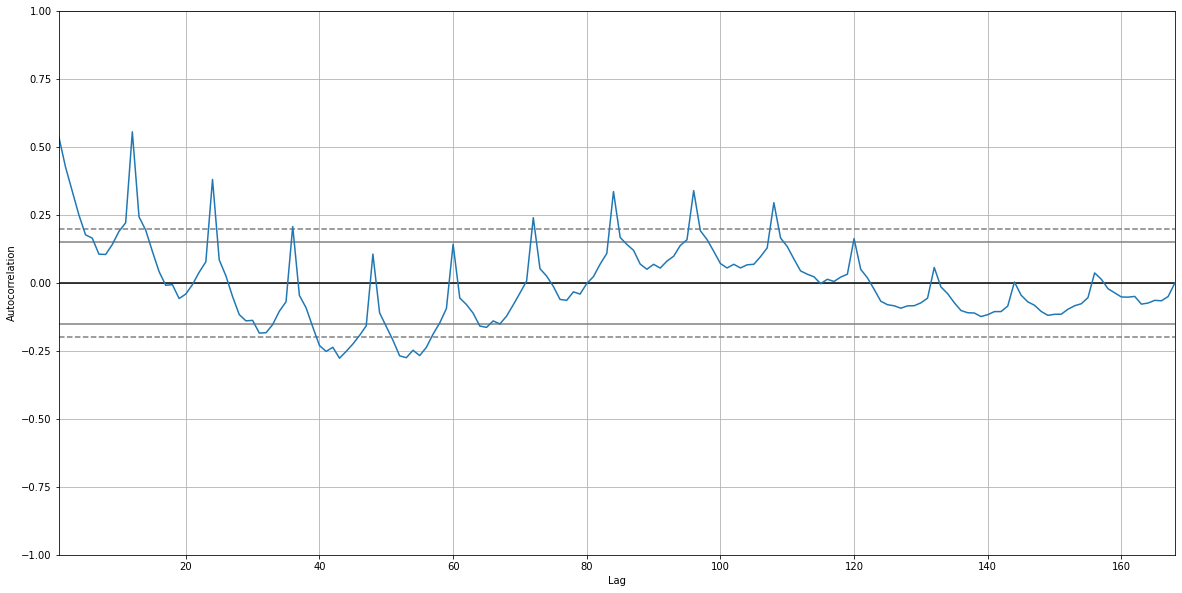

In [ ]:
#plotting the autocorrelation for diet
plt.figure(figsize=(20,10))

pd.plotting.autocorrelation_plot(data['Diet'])




Answering the below questions

1) What do the dotted l ines represent?

The dotted lines represent the 99 % confidence intervals.


What is the seasonality




seasonality refers to the predictable occurances that happen at a regular intervals in less than or equal to the time frame of the year example holidays, seasons, semesters etc.

In the given scenario I could see that once we decompose the data into its seasonal components the parameters for Gym and diet alwyas reach their peak during the begining of the year and drop significantly at the end of the year.And hence we can say that people tend to be more diet and gym concious at the beginig of the year rather than at the later part of the year.


Text(0.5, 1.0, 'The seasonality component of the data')

<Figure size 1440x720 with 0 Axes>

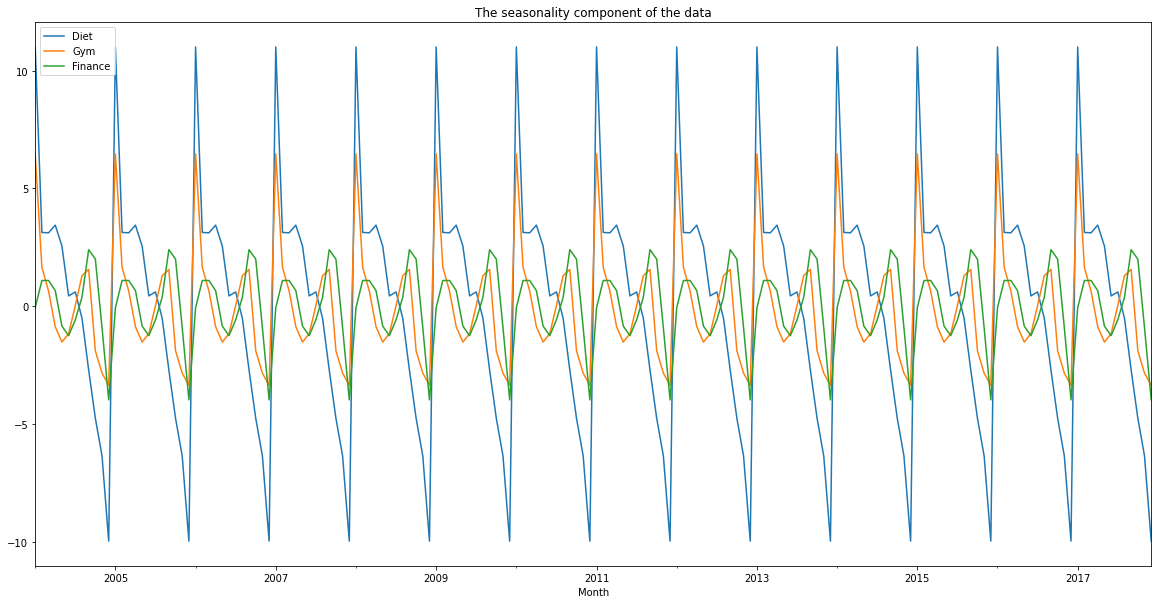

In [ ]:
# please find the reference for this code https://sigmundojr.medium.com/seasonality-in-python-additive-or-multiplicative-model-d4b9cf1f48a7

from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(20,10))



check_seasonality= seasonal_decompose(df(data), model='additive',extrapolate_trend='freq')
check_seasonality.seasonal.plot(figsize=(20,10))
plt.title('The seasonality component of the data')

